In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# load data from api

In [6]:
# load data from api
df = pd.read_json(r'https://zerofourtwo.net/api/dataset')

In [8]:
df.head()

,_id,_date,_user,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_max,bm_HR_avg,bm_HR_var,bm_act_steps,bm_sleep
0,1,None,jjj,9,40.0000,3.0,47.2222,62.9630,3255.0,NaN,59.0,71.0,NaN,4.0
1,2,2024-02-01T23:31:26.000Z,jjj,2,92.3077,2.0,58.0645,87.8049,2135.0,NaN,NaN,NaN,NaN,NaN
2,3,2024-02-02T23:52:30.000Z,jjj,2,92.3077,2.0,57.3770,70.0000,2018.0,NaN,60.0,61.0,NaN,4.0
3,4,2024-02-03T18:18:04.000Z,jjj,6,52.1739,3.0,47.6190,76.9231,2580.0,NaN,68.0,41.0,NaN,2.0
4,5,2024-02-02T13:10:54.000Z,jjj,8,52.1739,3.0,43.5897,80.9524,3495.0,220.0,NaN,NaN,NaN,NaN


In [11]:
print(df.columns)

Index(['_id', '_date', '_user', 'fm_avg_trk_time', 'fm_accuracy',
       'vx_avg_res_time', 'vx_shot_accuracy', 'vx_trg_accuracy',
       'au_avg_res_time', 'bm_HR_max', 'bm_HR_avg', 'bm_HR_var',
       'bm_act_steps', 'bm_sleep'],
      dtype='object')


In [12]:
df.shape

(53, 14)

In [15]:
df.isna().sum()

_id                  0
_date                6
_user                0
fm_avg_trk_time      0
fm_accuracy          0
vx_avg_res_time      1
vx_shot_accuracy     1
vx_trg_accuracy      1
au_avg_res_time      1
bm_HR_max           49
bm_HR_avg           17
bm_HR_var           17
bm_act_steps        53
bm_sleep            17
dtype: int64

In [17]:
# get columns with missing values
columns_with_missing_values  = df.columns[df.isnull().any()]
print(columns_with_missing_values)

Index(['_date', 'vx_avg_res_time', 'vx_shot_accuracy', 'vx_trg_accuracy',
       'au_avg_res_time', 'bm_HR_max', 'bm_HR_avg', 'bm_HR_var',
       'bm_act_steps', 'bm_sleep'],
      dtype='object')


In [22]:
# remove rows that we don't need
unNeededColumns = ['_id', '_date', '_user', 'bm_HR_max', 'bm_act_steps']
df.drop(unNeededColumns, axis=1, inplace=True)

In [23]:
df.head()

,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_avg,bm_HR_var,bm_sleep
0,9,40.0000,3.0,47.2222,62.9630,3255.0,59.0,71.0,4.0
1,2,92.3077,2.0,58.0645,87.8049,2135.0,NaN,NaN,NaN
2,2,92.3077,2.0,57.3770,70.0000,2018.0,60.0,61.0,4.0
3,6,52.1739,3.0,47.6190,76.9231,2580.0,68.0,41.0,2.0
4,8,52.1739,3.0,43.5897,80.9524,3495.0,NaN,NaN,NaN


In [25]:
df.columns

Index(['fm_avg_trk_time', 'fm_accuracy', 'vx_avg_res_time', 'vx_shot_accuracy',
       'vx_trg_accuracy', 'au_avg_res_time', 'bm_HR_avg', 'bm_HR_var',
       'bm_sleep'],
      dtype='object')

In [26]:
df.isna().sum()

fm_avg_trk_time      0
fm_accuracy          0
vx_avg_res_time      1
vx_shot_accuracy     1
vx_trg_accuracy      1
au_avg_res_time      1
bm_HR_avg           17
bm_HR_var           17
bm_sleep            17
dtype: int64

In [31]:
dfClean = df.dropna()
dfClean.shape

(36, 9)

In [32]:
dfClean.isna().sum()

fm_avg_trk_time     0
fm_accuracy         0
vx_avg_res_time     0
vx_shot_accuracy    0
vx_trg_accuracy     0
au_avg_res_time     0
bm_HR_avg           0
bm_HR_var           0
bm_sleep            0
dtype: int64

In [56]:
dfClean.head()


,fm_avg_trk_time,fm_accuracy,vx_avg_res_time,vx_shot_accuracy,vx_trg_accuracy,au_avg_res_time,bm_HR_avg,bm_HR_var,bm_sleep
0,9,40.0000,3.0,47.2222,62.9630,3255.0,59.0,71.0,4.0
2,2,92.3077,2.0,57.3770,70.0000,2018.0,60.0,61.0,4.0
3,6,52.1739,3.0,47.6190,76.9231,2580.0,68.0,41.0,2.0
5,5,80.0000,2.0,44.6809,87.5000,1850.0,66.0,33.0,0.0
6,2,92.3077,2.0,55.7377,85.0000,1689.0,65.0,36.0,4.0


In [ ]:
X = dfClean.iloc[:, -3:]
X.head()

In [65]:
y_fm_time = dfClean.iloc[:, 0:1]
y_fm_acc = dfClean.iloc[:, 1:2]
y_vx_time = dfClean.iloc[:, 2:3]
y_vx_shot_acc = dfClean.iloc[:, 3:4]
y_vx_trg_acc = dfClean.iloc[:, 4:5]
y_au_time = dfClean.iloc[:, 5:6]



In [ ]:
# print mean standard variance of dfclean
print(dfClean.describe())

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


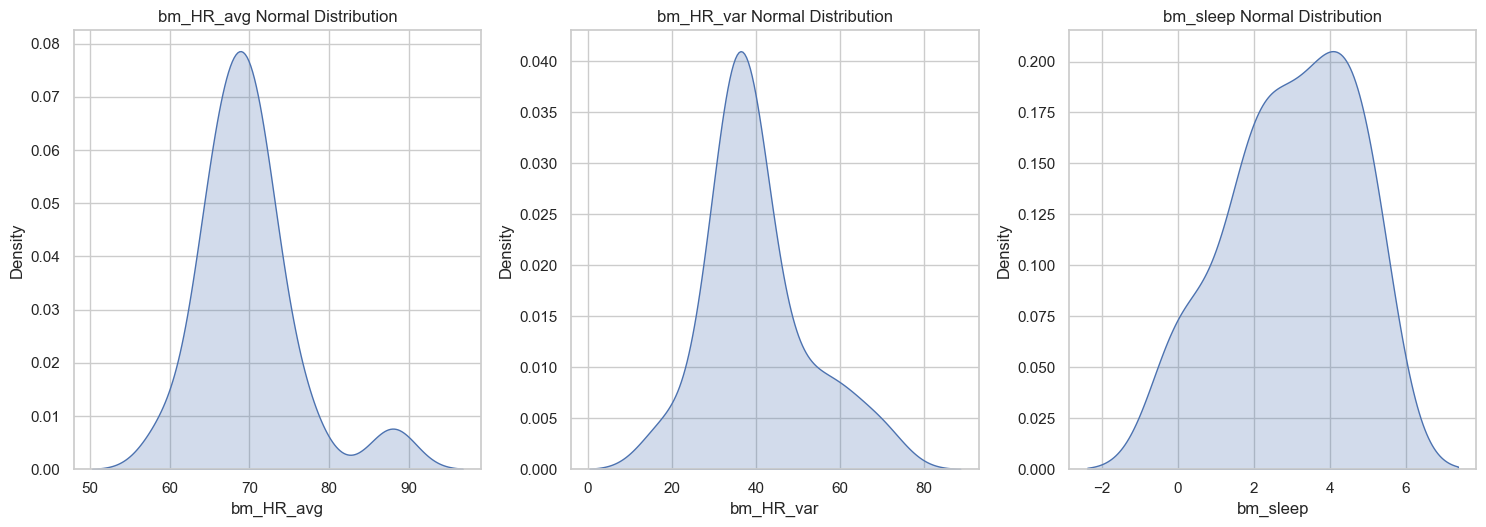

In [61]:
# print normal distribution of data all columns in subplots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
for i, column in enumerate(dfClean.iloc[:, -3:]):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(data=dfClean[column], fill=True)
    plt.title(f'{column} Normal Distribution')
plt.tight_layout()
plt.show()

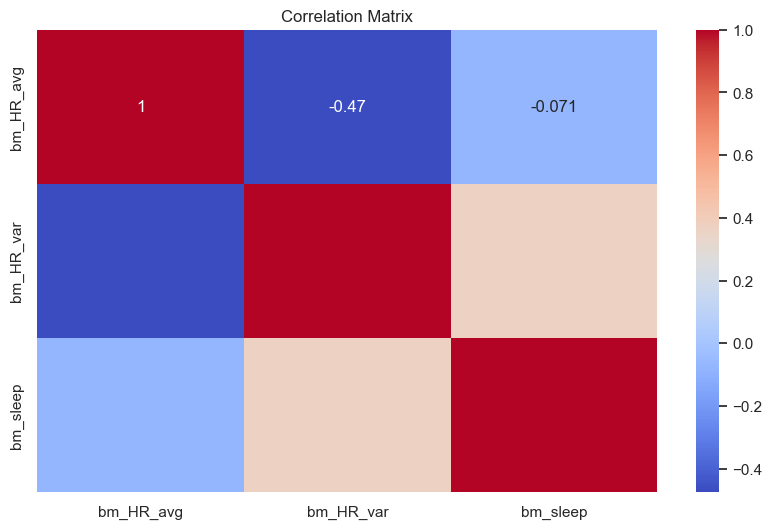

In [63]:
# print correlation matrix
corr = dfClean.iloc[:, -3:].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

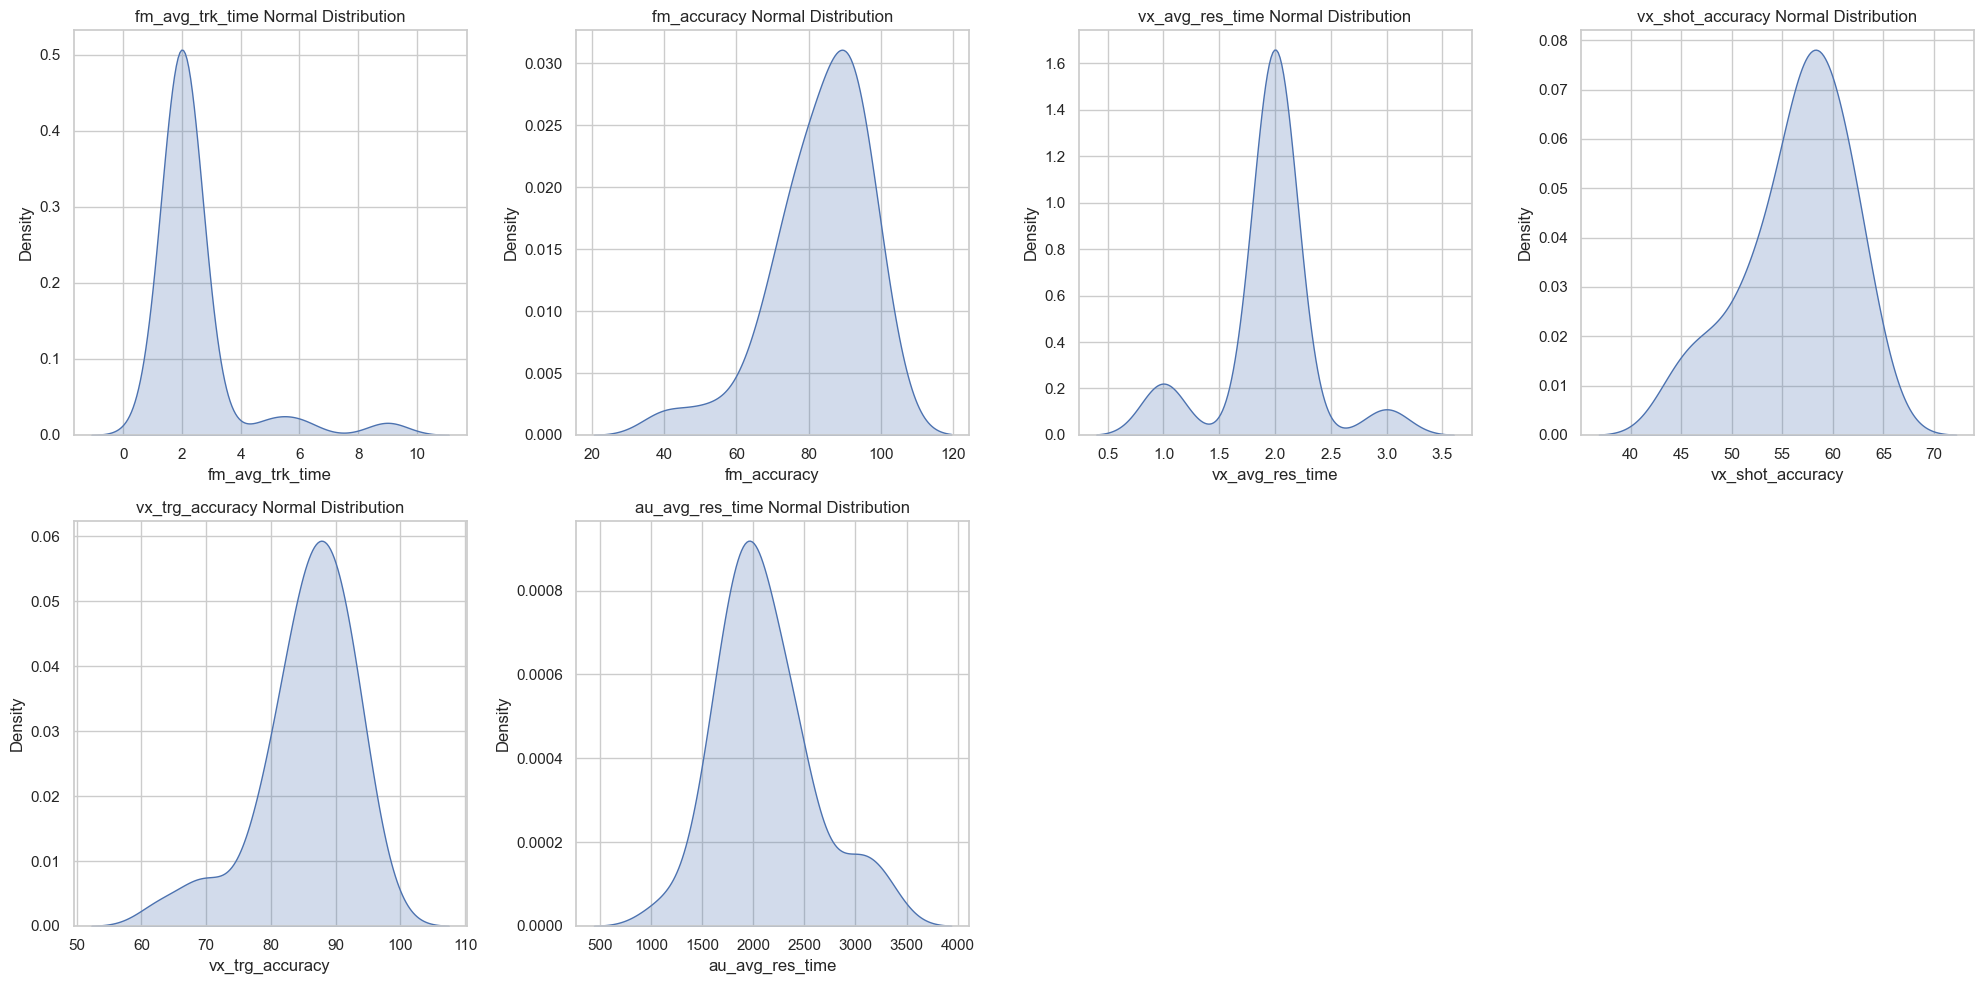

In [136]:
# plot y data using subplots
plt.figure(figsize=(20, 10))
for i, column in enumerate(dfClean.iloc[:, 0:6]):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(data=dfClean[column], fill=True)
    plt.title(f'{column} Normal Distribution')
plt.tight_layout()
plt.show()

In [134]:
# scale ys data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_fm_time_scaled = scaler.fit_transform(y_fm_time)
y_fm_acc_scaled = scaler.fit_transform(y_fm_acc)
y_vx_time_scaled = scaler.fit_transform(y_vx_time)
y_vx_shot_acc_scaled = scaler.fit_transform(y_vx_shot_acc)
y_vx_trg_acc_scaled = scaler.fit_transform(y_vx_trg_acc)
y_au_time_scaled = scaler.fit_transform(y_au_time)



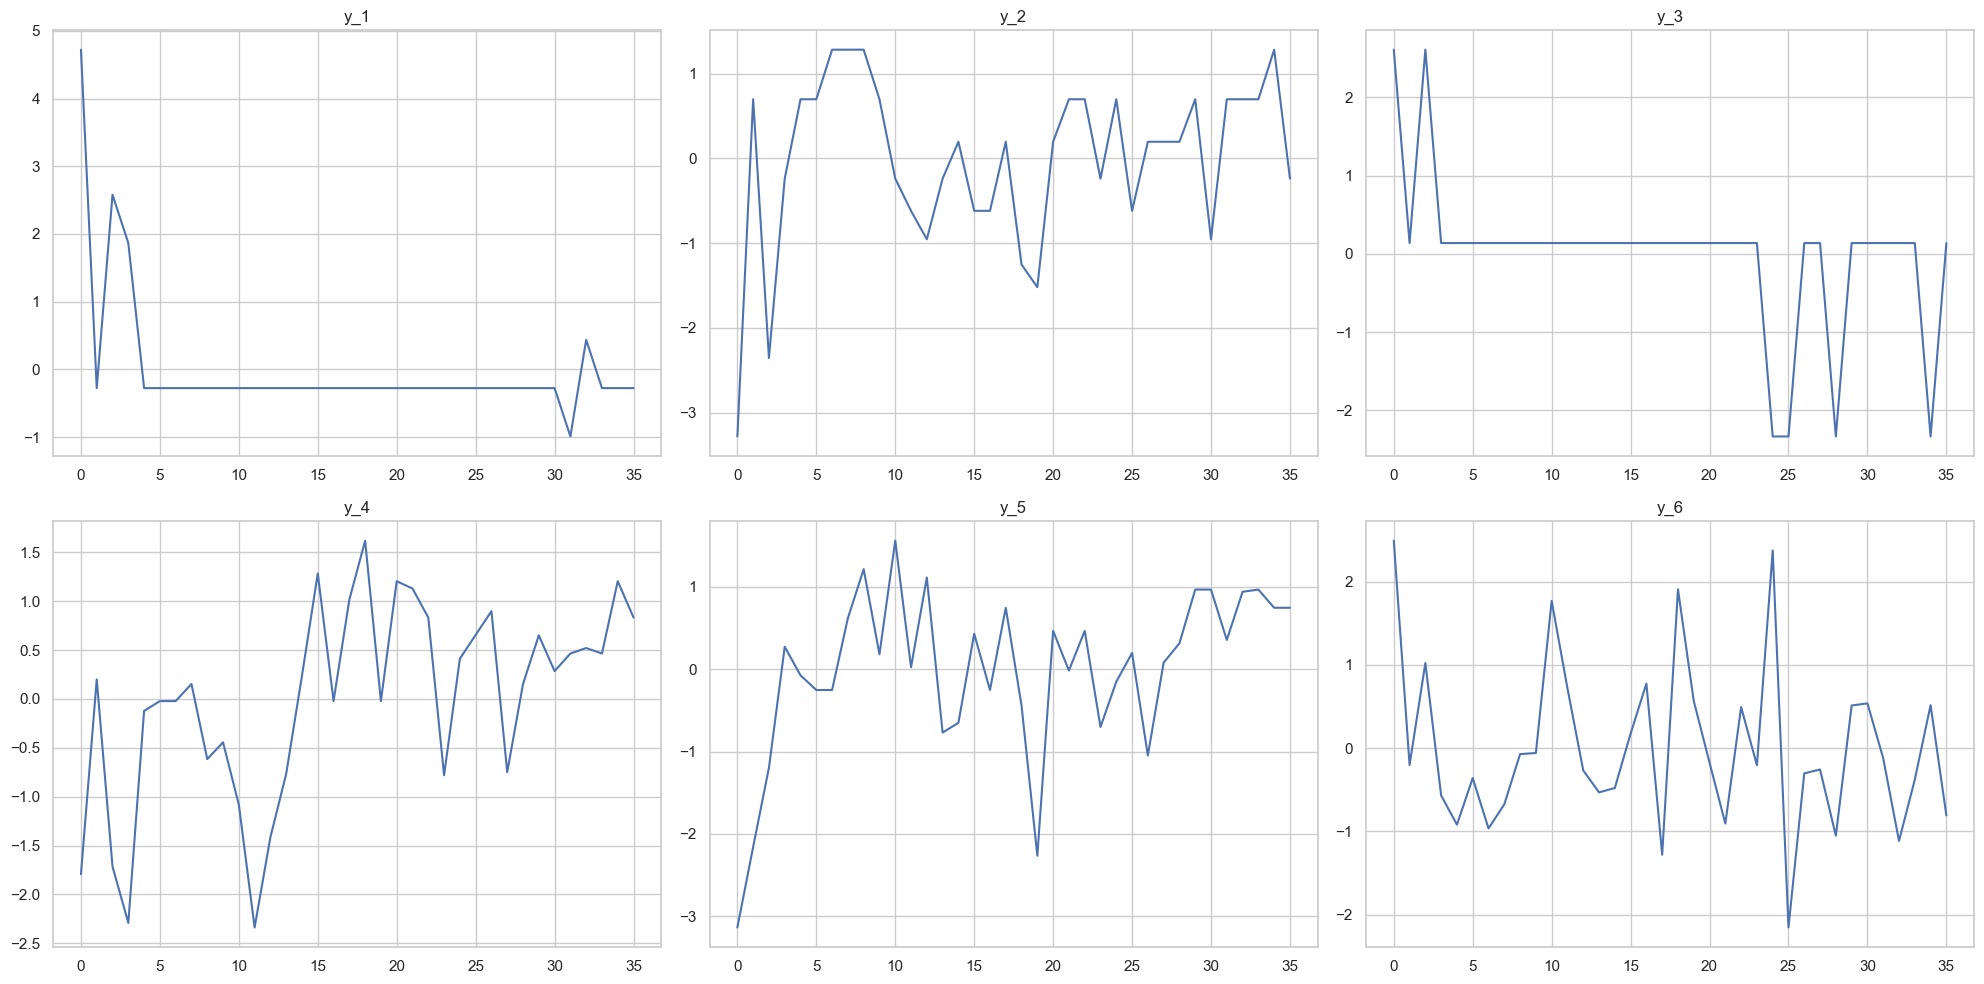

In [138]:
# plot scaled data using subplots sns.kdeplot
plt.figure(figsize=(20, 10))
for i, y in enumerate([y_fm_time_scaled, y_fm_acc_scaled, y_vx_time_scaled, y_vx_shot_acc_scaled, y_vx_trg_acc_scaled, y_au_time_scaled]):
    plt.subplot(2, 3, i+1)
    plt.plot(y)
    plt.title(f'y_{i+1}')
plt.tight_layout()
plt.show()

In [139]:
# split the data using scaled data
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_fm_time_train, y_fm_time_test, y_fm_acc_train, y_fm_acc_test, y_vx_time_train, y_vx_time_test, y_vx_shot_acc_train, y_vx_shot_acc_test, y_vx_trg_acc_train, y_vx_trg_acc_test, y_au_time_train, y_au_time_test = train_test_split(X, y_fm_time_scaled, y_fm_acc_scaled, y_vx_time_scaled, y_vx_shot_acc_scaled, y_vx_trg_acc_scaled, y_au_time_scaled, test_size=0.2, random_state=4217)


In [140]:
# print the shape of the data
print(X_train.shape, X_test.shape, y_fm_time_train.shape, y_fm_time_test.shape, y_fm_acc_train.shape, y_fm_acc_test.shape, y_vx_time_train.shape, y_vx_time_test.shape, y_vx_shot_acc_train.shape, y_vx_shot_acc_test.shape, y_vx_trg_acc_train.shape, y_vx_trg_acc_test.shape, y_au_time_train.shape, y_au_time_test.shape)

(28, 3) (8, 3) (28, 1) (8, 1) (28, 1) (8, 1) (28, 1) (8, 1) (28, 1) (8, 1) (28, 1) (8, 1) (28, 1) (8, 1)


In [75]:
# # split the data
# from sklearn.model_selection import train_test_split

# # split the data using all the y values
# X_train, X_test, y_fm_time_train, y_fm_time_test, y_fm_acc_train, y_fm_acc_test, y_vx_time_train, y_vx_time_test, y_vx_shot_acc_train, y_vx_shot_acc_test, y_vx_trg_acc_train, y_vx_trg_acc_test, y_au_time_train, y_au_time_test = train_test_split(X, y_fm_time, y_fm_acc, y_vx_time, y_vx_shot_acc, y_vx_trg_acc, y_au_time, test_size=0.2, random_state=4217)


In [76]:
# X_train.shape, X_test.shape, y_fm_time_train.shape, y_fm_time_test.shape, y_fm_acc_train.shape, y_fm_acc_test.shape, y_vx_time_train.shape, y_vx_time_test.shape, y_vx_shot_acc_train.shape, y_vx_shot_acc_test.shape, y_vx_trg_acc_train.shape, y_vx_trg_acc_test.shape, y_au_time_train.shape, y_au_time_test.shape

((28, 3),
 (8, 3),
 (28, 1),
 (8, 1),
 (28, 1),
 (8, 1),
 (28, 1),
 (8, 1),
 (28, 1),
 (8, 1),
 (28, 1),
 (8, 1),
 (28, 1),
 (8, 1))

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [142]:
# setup parameters for grid search
param_grid = [
    {
        'scaler' : [StandardScaler(), MinMaxScaler()],
        'regressor' : [LogisticRegression()],
        'regressor__penalty' : ['l1', 'l2'],
        'regressor__C' : np.logspace(-4, 4, 5),
        'regressor__solver' : ['liblinear'],
      },
    {
          'scaler' : [StandardScaler(), MinMaxScaler()],
          'regressor' : [SVR()],
          'regressor__C' : np.logspace(-4, 4, 5),
          'regressor__gamma' : np.logspace(-1, 1, 8),
    #     'regressor__kernel' : ['linear', 'rbf']
      },
      {
          'scaler' : [StandardScaler(), MinMaxScaler()],
          'regressor' : [KNeighborsRegressor()],
          'regressor__n_neighbors' : list(range(2, 3, 1)),
  
     }
]
 

In [143]:
# create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LogisticRegression())
])

In [148]:
gs_fm_acc = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
%time gs_fm_acc.fit(X_train, y_fm_acc_train.ravel())

Fitting 5 folds for each of 102 candidates, totalling 510 fits
CPU times: total: 234 ms
Wall time: 4.02 s


C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LogisticRegression()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__penalty': ['l1', 'l2'],
                          'regressor__solver': ['liblinear'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [SVR()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__gamma': array([ 0.1       ,  0.19306977,  0.37275937,  0.71968567,  1.38949549,
        2.6826958 ,  5.17947468, 10.        ]),
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [2],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             verbose=1)

In [149]:
gs_fm_acc.best_params_

{'regressor': SVR(),
 'regressor__C': 1.0,
 'regressor__gamma': 0.1,
 'scaler': MinMaxScaler()}

In [152]:
# print the best score
gs_fm_acc.best_score_

-0.25414357003296495

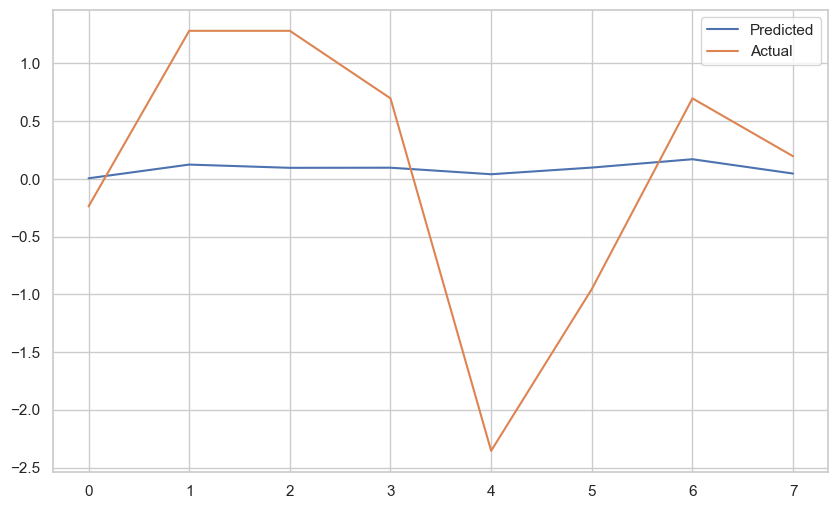

In [151]:
gs_fm_acc.score(X_test, y_fm_acc_test)
# plot the best estimator
plt.figure(figsize=(10, 6))
plt.plot(gs_fm_acc.best_estimator_.predict(X_test), label='Predicted')
plt.plot(y_fm_acc_test, label='Actual')
plt.legend()


In [114]:
#import linearregression
from sklearn.linear_model import LinearRegression
# create a model
model = LinearRegression()
# fit the model
model.fit(X_train, y_fm_time_train.to_numpy())
# make predictions
y_pred = model.predict(X_test)
# print the predictions
print(y_pred)


[[2.593026  ]
 [1.93679003]
 [2.32713563]
 [2.22792291]
 [2.58157277]
 [2.47741211]
 [1.82505602]
 [2.45163558]]


In [118]:
# create a logisticregression model
from sklearn.linear_model import LogisticRegression
# create a model
model = LogisticRegression(max_iter=10000, penalty='l2', C=1.0, solver='liblinear')
# fit the model
model.fit(X_train, y_fm_time_train.to_numpy())
# make predictions
y_pred = model.predict(X_test)
# print the predictions
print(y_pred)

[2 2 2 2 2 2 2 2]


C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [153]:
gs_fm_time = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
%time gs_fm_time.fit(X_train, y_fm_time_train.ravel())

Fitting 5 folds for each of 102 candidates, totalling 510 fits
CPU times: total: 312 ms
Wall time: 591 ms


C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 510.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rodri\AppData\Roaming\Python\Python311\sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'regressor': [LogisticRegression()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__penalty': ['l1', 'l2'],
                          'regressor__solver': ['liblinear'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [SVR()],
                          'regressor__C': array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04]),
                          'regressor__gamma': array([ 0.1       ,  0.19306977,  0.37275937,  0.71968567,  1.38949549,
        2.6826958 ,  5.17947468, 10.        ]),
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__n_neighbors': [2],
                          'scaler': [StandardScaler(), MinMaxScaler()]}],
             verbose=1)

In [154]:
# print the best parameters
gs_fm_time.best_params_

{'regressor': SVR(),
 'regressor__C': 1.0,
 'regressor__gamma': 0.372759372031494,
 'scaler': MinMaxScaler()}

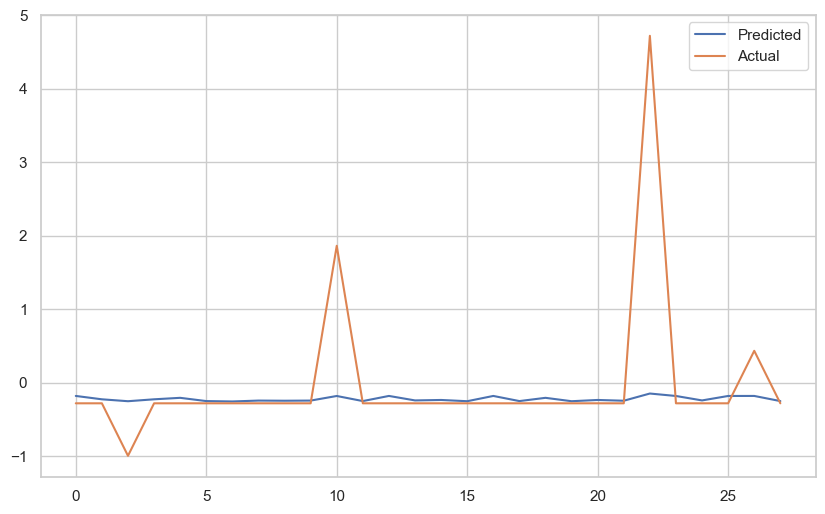

In [158]:
# test model
y_pred = gs_fm_time.predict(X_train)
# plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='Predicted')
plt.plot(y_fm_time_train, label='Actual')
plt.legend()
plt.show()


In [156]:
# accuracy score
gs_fm_time.score(X_test, y_fm_time_test)

-0.10886818844521717

In [1]:
## ramdom forest regressor
from sklearn.ensemble import RandomForestRegressor
# create a model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_fm_time_train.ravel())
# make predictions
y_pred = model.predict(X_test)
# print the predictions
print(y_pred)

NameError: name 'X_train' is not defined

In [3]:
app = Flask(__name__)
CORS(app)

# Global variable to keep track of the current image index
current_image_index = 0

# Function to get the next image filename
def get_next_image():
    global current_image_index
    image_folder = r'C:\Users\rodri\repos\exec_dash\images'
    images = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]
    if current_image_index < len(images):
        next_image = images[current_image_index]
        current_image_index += 1
        return next_image
    else:
        # Reset the index when all images are displayed
        current_image_index = 0
        if images:
            return images[current_image_index]
        else:
            return None

# Route to serve the next image
@app.route('/')
def serve_next_image():
    next_image = get_next_image()
    if next_image:
        return f'''
            <html>
                <head>
                    <style>
                        img {{
                            width: 1000px; /* Set width to your desired size */
                            height: auto; /* Maintain aspect ratio */
                        }}
                    </style>
                </head>
                <body>
                    <img src="/images/{next_image}" alt="{next_image}">
                    <br>
                    <a href="/">Next Image</a>
                </body>
            </html>
        '''
    else:
        return "No images found."

# Route to serve individual image
@app.route('/images/<path:filename>')
def serve_image(filename):
    print("Request received for:", filename)
    return send_from_directory(r'C:\Users\rodri\repos\exec_dash\images', filename)

# Run the Flask application
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [04/Apr/2024 10:16:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 10:30:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 10:30:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 10:30:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:37:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:40:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:40:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:40:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:44:12] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:44:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:45:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:46:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 11:46:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 12:14:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 12:15:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Apr/2024 12:53:24] "GET /